<a href="https://www.kaggle.com/code/chandanarprasad/eda-microbusiness-density-forecasting?scriptVersionId=119949079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

In [2]:
# "row_id" is a unique identifier for each row.
# "cfips" is a unique identifier for each county using the Federal Information Processing System. The first two digits correspond to the state FIPS code, while the following 3 represent the county.
# "county_name" is the written name of the county.
# "state_name" is the name of the state.
# "first_day_of_month" is the date of the first day of the month.
# "microbusiness_density" is microbusinesses per 100 people over the age of 18 in the given county and is the target variable. The population figures used to calculate the density are on a two-year lag due to the pace of update provided by the U.S. Census Bureau.
# "active" is the raw count of microbusinesses in the county, but it is not provided for the test set.

In [3]:
# "pctbb[year]" is the percentage of households in the county with access to broadband of any type.
# "cfips" is the CFIPS code.
# "pctcollege[year]" is the percent of the population in the county over age 25 with a 4-year college degree.
# "pct_foreignborn[year]" is the percent of the population in the county born outside of the United States.
# "pct_itworkers[year]" is the percent of the workforce in the county employed in information related industries.
# "median_hhinc[year]" is the median household income in the county.

In [4]:
df_train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
df_test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')
df_census = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')
submission = pd.read_csv("/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv")

In [5]:
print(df_train.shape)
df_train.head()

(122265, 7)


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [6]:
print(df_test.shape)
df_test.head()

(25080, 3)


,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [7]:
print(df_census.shape)
df_census.head()

(3142, 26)


,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [8]:
df_train.columns

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active'],
      dtype='object')

In [9]:
df_test.columns

Index(['row_id', 'cfips', 'first_day_of_month'], dtype='object')

In [10]:
df_census.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25080 entries, 0 to 25079
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              25080 non-null  object
 1   cfips               25080 non-null  int64 
 2   first_day_of_month  25080 non-null  object
dtypes: int64(1), object(2)
memory usage: 587.9+ KB


In [13]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [14]:
df_train.first_day_of_month = pd.to_datetime(df_train.first_day_of_month)
df_test.first_day_of_month = pd.to_datetime(df_test.first_day_of_month)

In [15]:
df_train.isna().any().sum()

0

In [16]:
df_test.isna().any().sum()

0

In [17]:
df_census.isna().any().sum()

12

In [18]:
df_train.county.value_counts(sort='descending').head(10)

Washington County    1170
Jefferson County      975
Franklin County       936
Lincoln County        897
Jackson County        897
Madison County        741
Montgomery County     702
Clay County           702
Union County          663
Monroe County         663
Name: county, dtype: int64

In [19]:
df_train.county.value_counts(sort='descending').tail(10)

Piscataquis County       39
Penobscot County         39
Oxford County            39
Kennebec County          39
Aroostook County         39
Androscoggin County      39
Winn Parish              39
West Feliciana Parish    39
West Carroll Parish      39
Weston County            39
Name: county, dtype: int64

In [20]:
df_train.state.value_counts(sort='descending').head(10)

Texas             9906
Georgia           6201
Virginia          5070
Kentucky          4680
Missouri          4485
Kansas            4095
Illinois          3978
North Carolina    3900
Iowa              3861
Tennessee         3705
Name: state, dtype: int64

In [21]:
df_train.state.value_counts(sort='descending').tail(10)

Maine                   624
Arizona                 585
Vermont                 546
Massachusetts           546
New Hampshire           390
Connecticut             312
Rhode Island            195
Hawaii                  195
Delaware                117
District of Columbia     39
Name: state, dtype: int64

In [22]:
df_train.sort_values(by = ['active','state'],ascending=False)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
7887,6037_2020-05-01,6037,Los Angeles County,California,2020-05-01,14.872819,1167744
7886,6037_2020-04-01,6037,Los Angeles County,California,2020-04-01,14.785244,1160868
7916,6037_2022-10-01,6037,Los Angeles County,California,2022-10-01,14.668964,1153292
7913,6037_2022-07-01,6037,Los Angeles County,California,2022-07-01,14.663240,1152842
7914,6037_2022-08-01,6037,Los Angeles County,California,2022-08-01,14.650445,1151836
...,...,...,...,...,...,...,...
55648,28055_2022-06-01,28055,Issaquena County,Mississippi,2022-06-01,0.000000,0
55649,28055_2022-07-01,28055,Issaquena County,Mississippi,2022-07-01,0.000000,0
55650,28055_2022-08-01,28055,Issaquena County,Mississippi,2022-08-01,0.000000,0
55651,28055_2022-09-01,28055,Issaquena County,Mississippi,2022-09-01,0.000000,0


In [23]:
df_train.sort_values(['cfips','first_day_of_month'])

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [24]:
df_train.groupby('cfips').count()

,row_id,county,state,first_day_of_month,microbusiness_density,active
cfips,,,,,,
1001,39,39,39,39,39,39
1003,39,39,39,39,39,39
1005,39,39,39,39,39,39
1007,39,39,39,39,39,39
1009,39,39,39,39,39,39
...,...,...,...,...,...,...
56037,39,39,39,39,39,39
56039,39,39,39,39,39,39
56041,39,39,39,39,39,39


In [25]:
df_train.microbusiness_density.value_counts(bins=10)

(-0.285, 28.434]      121806
(28.434, 56.868]         345
(56.868, 85.302]          61
(85.302, 113.736]         32
(199.038, 227.472]         9
(170.604, 199.038]         4
(142.17, 170.604]          3
(113.736, 142.17]          2
(255.906, 284.34]          2
(227.472, 255.906]         1
Name: microbusiness_density, dtype: int64

In [26]:
df_train[df_train.cfips.isin(df_census.cfips)]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [27]:
df_train[df_train.cfips.isin(df_test.cfips)]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [28]:
df_train.microbusiness_density.corr(df_train.active)

0.3169811826046079

In [29]:
# result = pd.concat([df_train, df_census], axis=1, join="outer")
# result.isna().any().sum()

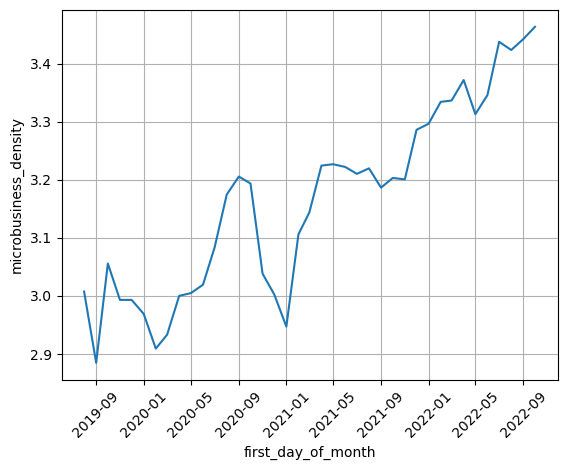

In [30]:
df_sample=df_train[df_train["cfips"]==1001]

sns.lineplot(data=df_sample,x="first_day_of_month",y="microbusiness_density")
plt.grid()
plt.xticks(rotation=45);

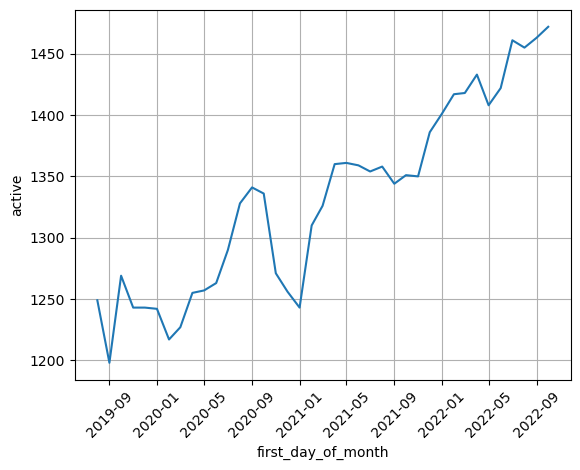

In [31]:
df_sample=df_train[df_train["cfips"]==1001]

sns.lineplot(data=df_sample,x="first_day_of_month",y="active")
plt.grid()
plt.xticks(rotation=45);

In [32]:
df_test['microbusiness_density'] = 0

In [33]:
for cfip in tqdm(df_train['cfips'].unique()):
    naive_model = df_train['microbusiness_density'].loc[df_train['cfips'] == cfip].tail(1)
    df_test['microbusiness_density'].loc[df_test['cfips'] == cfip] = naive_model.values[0]

  0%|          | 0/3135 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 3135/3135 [00:02<00:00, 1189.68it/s]


In [34]:
submission["microbusiness_density"] = df_test['microbusiness_density'].values
submission.to_csv("submission.csv", index=False)